In [87]:
import numpy as np
import matplotlib.pyplot as plt

def solve_tridiagonal(A, b):
    """
    Solves a tridiagonal system of equations using the Thomas algorithm.

    Parameters:
    A (ndarray): A tridiagonal matrix of shape (n, n).
    d (ndarray): A column vector of constants of shape (n, 1).

    Returns:
    x (ndarray): A column vector of variables that solve the system of equations.
    """
    n = A.shape[0]
    #print(n)
    # Create temporary arrays to hold the modified coefficients
    c = np.zeros(n-1)
    d = np.zeros(n)

    # Perform forward elimination
    c[0] = A[0,1] / A[0,0]
    d[0] = b[0] / A[0,0]

    for i in range(1, n-1):
        c[i] = A[i,i+1] / (A[i,i] - A[i,i-1]*c[i-1])
        d[i] = (b[i] - A[i,i-1]*d[i-1]) / (A[i,i] - A[i,i-1]*c[i-1])

    # Perform backward substitution
    d[n-1] = (b[n-1] - A[n-1,n-2]*b[n-2]) / (A[n-1,n-1] - A[n-1,n-2]*c[n-2])

    for i in range(n-2, -1, -1):
        d[i] = d[i] - c[i]*d[i+1]

    return d



0.0001


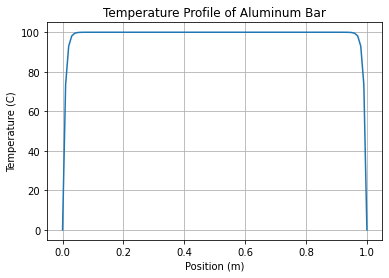

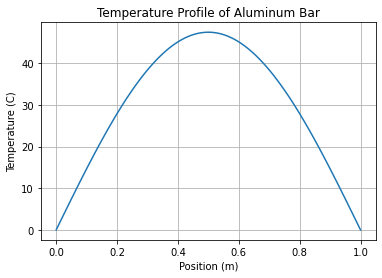

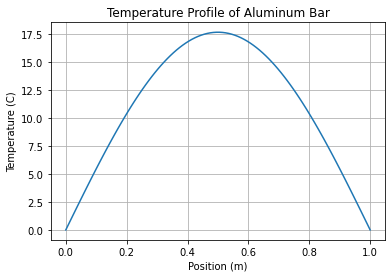

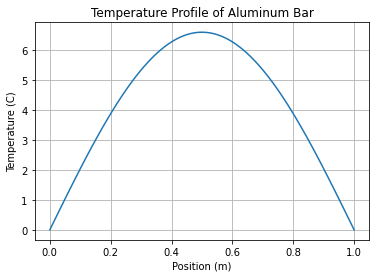

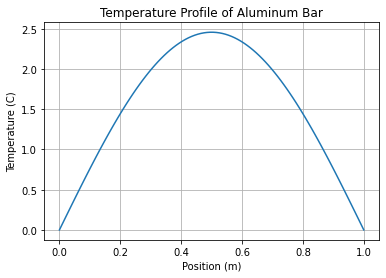

In [88]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the aluminum bar (m)
#w = 1.0  # Width of the aluminum bar (m)
T0 = 100.0  # Initial temperature of the aluminum bar (C)
T1 = 0.0  # Temperature of the ice water (C)
#k = 205.0  # Thermal conductivity of aluminum (W/m*K)
#rho = 2700.0  # Density of aluminum (kg/m^3)
#c = 900.0  # Specific heat capacity of aluminum (J/kg*K)
alpha =1# k / (rho * c)  # Thermal diffusivity of aluminum (m^2/s)

# Discretization parameters
N = 100  # Number of spatial nodes
M =5000 # Number of time steps
dx = L / (N - 1)  # Spatial step size
dt =1e-4 # Time step size
print(dt)
# Initial condition
T = np.full(N, T0)
b = np.zeros(N)
A = np.zeros((N, N))
A[0, 0] = 1.0
A[N - 1, N - 1] = 1.0
for i in range(1, N - 1): #tridiagonal matrix
    A[i, i - 1] = -0.5 * alpha * dt / dx**2
    A[i, i] = 1.0 + alpha * dt / dx**2
    A[i, i + 1] = -0.5 * alpha * dt / dx**2
for n in range(M):
    for i in range(1, N - 1):
        b[i] = T[i] + 0.5 * alpha * dt / dx**2 * (T[i - 1] - 2.0 * T[i] + T[i + 1])
    x = np.linspace(0, L, N)
    T = solve_tridiagonal(A, b)
    if(n%1000==0):
        plt.plot(x, T)
        plt.xlabel('Position (m)')
        plt.ylabel('Temperature (C)')
        plt.title('Temperature Profile of Aluminum Bar')
        plt.grid(True)
    plt.show()
   



In [92]:
print(np.shape(A))
A

(100, 100)


array([[ 1.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [-0.49005,  1.9801 , -0.49005, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     , -0.49005,  1.9801 , ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  1.9801 , -0.49005,  0.     ],
       [ 0.     ,  0.     ,  0.     , ..., -0.49005,  1.9801 , -0.49005],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  1.     ]])

In [93]:
import numpy as np
n=int(input("enter number of variables: "))
m= np.array([[1,2,0,10],[1,3,3,17],[0,3,10,22]])

enter number of variables: 3


In [94]:
m= np.array([[1,2,0,10],[1,3,3,17],[0,3,10,22]])
m

array([[ 1,  2,  0, 10],
       [ 1,  3,  3, 17],
       [ 0,  3, 10, 22]])

In [95]:
d=[]
for i in range(0,n):
    d.append(m[i,i])

In [96]:
d

[1, 3, 10]

In [97]:
a=[]
for i in range(0,n-1):
    a.append(m[i,i+1])

In [98]:
a=a+[0]
a

[2, 3, 0]

In [99]:
b=[]
for i in range(1,n):
    b.append(m[i,i-1])

In [65]:
b=[0]+b
b

[0, 1, 3]

In [66]:
r=[]
for i in range(0,n):
    r.append(m[i,n])

In [67]:
r

[10, 17, 22]

In [68]:
aa=np.zeros(n)
rr=np.zeros(n)

In [69]:
aa[0]=(a[0]/d[0])
aa[n-1]=0
aa[0],aa[2]

(2.0, 0.0)

In [70]:
rr[0]=(r[0]/d[0])
rr[0]

10.0

In [71]:
for i in range(1,n-1):
        aa[i]=a[i]/(d[i]-b[i]*aa[i-1])
        rr[i]=(r[i]-b[i]*rr[i-1])/(d[i]-b[i]*aa[i-1])

In [73]:
rr[n-1]=(r[n-1]-b[n-1]*rr[n-2])/(d[n-1]-b[n-1]*aa[n-2])

In [56]:
rr

array([10.,  7.,  1.])

In [57]:
aa

array([2., 3., 0.])

In [85]:
x=np.zeros(n)
x[n-1]=rr[n-1]
for i in range(n-2,0,-1):
    x[i]=rr[i]-aa[i]*x[i+1]

In [86]:
x

array([0., 4., 1.])